<span style="float:left;">Licence CC BY-SA</span><span style="float:right;">Fabrice Zaoui - Cedric Goeury&nbsp;</span><br/>
___

# Scalar flux computation on the bridge example of TELEMAC-2D

This tutorial is intended for people who want an example showing how to compute the scalar flux through a line.

In [1]:
from os import chdir, environ, path
from data_manip.extraction.telemac_file import TelemacFile
import numpy as np
from utils.geometry import get_norm2
from utils.exceptions import TelemacException
from data_manip.computation.polyline_integrals import flux_2d

The module 'polyline_integrals' is located in the '$HOMETEL/scripts/python3/data_manip/computation' directory. If an error occurs while attempting to import, check the value of the environment variable PYTHONPATH.


First, go to the example's directory to run it.

In [2]:
HOMETEL = environ.get('HOMETEL')
chdir(path.join(HOMETEL, 'notebooks', 'data'))

In [3]:
file_name = path.join(environ['HOMETEL'], 
                          'notebooks', 
                          'data',
                          'r2d_bridge.slf')

res = TelemacFile(file_name)

# Getting array of time values from file 
times = res.times

This is what the case looks like:

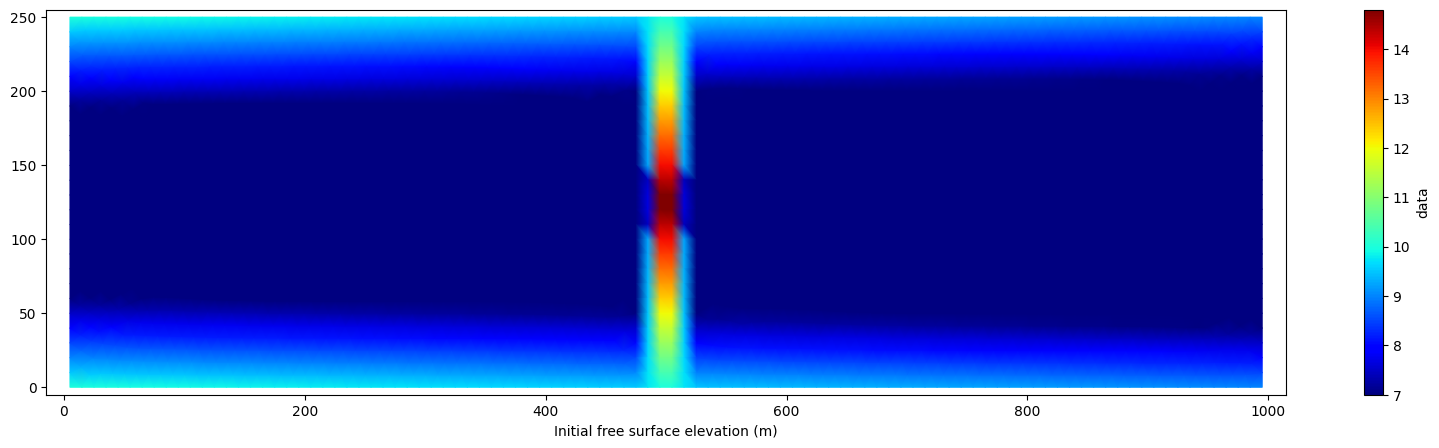

In [4]:
import matplotlib.pyplot as plt
from postel.plot2d import plot2d_scalar_map

# Initialising matplotlib figure
fig, ax = plt.subplots(figsize=(20, 5))

data = res.get_data_value('FREE SURFACE', 0)

# Plotting scalar map
plot2d_scalar_map(fig, ax, res.tri, data, 'Initial free surface elevation (m)')
    
# Showing the plot
plt.show()

Then, define a line as an array of np.array elements (required for the interpolation, check the Doxygen documentation of the script data_manip.extraction.telemac_file.py for more details). 

Define also the number of segments to be used for the discretisation of the line.

In [5]:
line = [np.array([100., 0.001]),np.array([100., 249.999])]
line_num = [1000]

Get the x and y velocities, the water depth and the scalar value for each discretized point of the line.

In [6]:
line_discrete, line_abs_curv, vel_x = res.get_timeseries_on_polyline('VELOCITY U',line,line_num)
line_discrete, line_abs_curv, vel_y = res.get_timeseries_on_polyline('VELOCITY V',line,line_num)
line_discrete, line_abs_curv, free_surf = res.get_timeseries_on_polyline('FREE SURFACE',line,line_num)
line_discrete, line_abs_curv, bottom = res.get_timeseries_on_polyline('BOTTOM',line,line_num)
line_discrete, line_abs_curv, scalar = res.get_timeseries_on_polyline('Traceur1',line,line_num)

The water depth is not in the output variables in this case but we can recover it by subtracting the bottom to the free-surface values.

In [7]:
water_depth = np.subtract(free_surf, bottom)

The flux is then the element-wise product of the vel_x (or vel_y) and water_depth arrays, that are composed of line_num columns and len(times) rows.

In [8]:
flux_x = np.multiply(vel_x, water_depth)
flux_y = np.multiply(vel_y, water_depth)

Now compute the integration of the scalar flux along the line:

In [9]:
scalar_flux = flux_2d(line_discrete, flux_x, flux_y, scalar)

To visualise the results, let us plot the evolution of the scalar flux through the line.

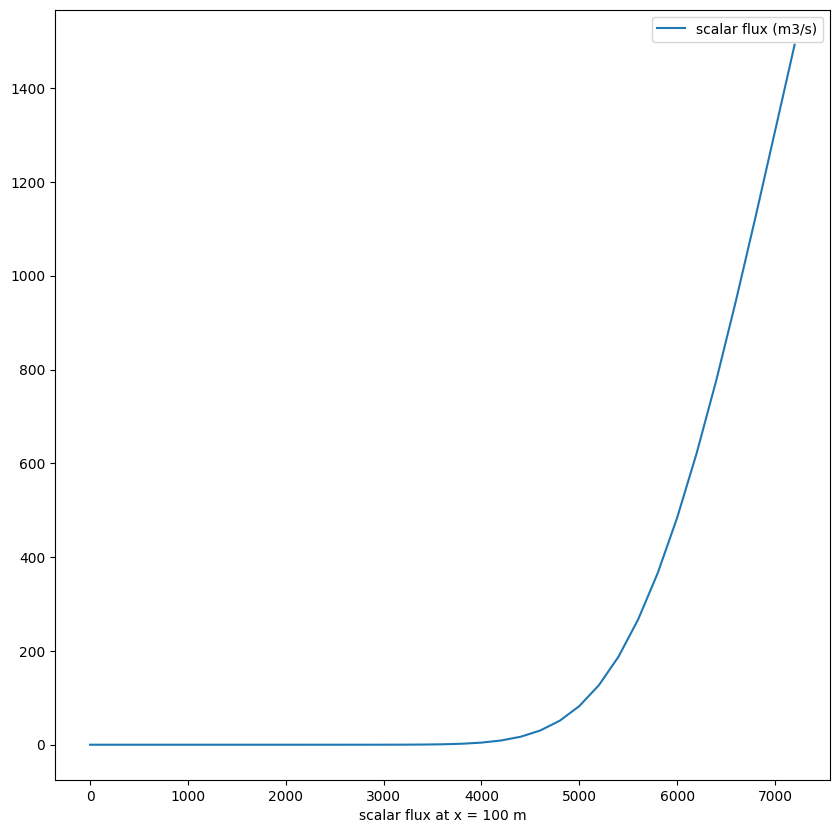

In [10]:
import matplotlib.pyplot as plt
from postel.plot1d import plot1d

#Initialising figure
fig, ax = plt.subplots(figsize=(10,10))

plot1d(ax, times, scalar_flux, 'scalar flux (m3/s)', 'scalar flux at x = 100 m')

# Displaying legend
ax.legend()

#Showing figure
plt.show()

del plt
del res